# 01 – Data Collection

This notebook downloads historical price data for a diversified universe of U.S. stocks and the SPY index (benchmark) using the **Yahoo Finance API**.  
The data covers the period **2000 – 2025** and serves as the foundation for the subsequent momentum-strategy analysis.

In [4]:
import os
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## 1. Define Universe and Download Parameters
We specify a balanced set of 20 large-cap U.S. stocks from different sectors (e.g., Technology, Energy, Financials, Consumer, Healthcare) together with the **SPY**. This ensures variety and realistic cross-sectional behavior for momentum testing.


In [5]:
tickers = [
    "AAPL", "MSFT", "INTC", "IBM", "ORCL",
    "AMZN", "HD", "MCD", "DIS",
    "KO", "PG", "WMT",
    "JNJ", "PFE", "MRK",
    "XOM", "CVX",
    "JPM", "BAC",
    "GE"
]

## 2. Download Daily Price Data
We retrieve **adjusted close prices** from Yahoo Finance to ensure all series are adjusted for dividends and splits. 
Missing tickers or delisted symbols are automatically skipped.


In [6]:
data = yf.download(
    tickers,
    start="2000-01-01",
    end="2025-01-01",
    auto_adjust=True
)["Close"]

[*********************100%***********************]  20 of 20 completed


## 3. Save Raw Data
The dataset is stored in `data/raw/sp500_20.csv` and will be used in the next notebook  
for monthly resampling and return calculations.

In [7]:
os.makedirs("data/raw", exist_ok=True)
data.to_csv("data/raw/sp500_20.csv")

In [8]:
data.head()

Ticker,AAPL,AMZN,BAC,CVX,DIS,GE,HD,IBM,INTC,JNJ,JPM,KO,MCD,MRK,MSFT,ORCL,PFE,PG,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.840094,4.468750,12.490805,16.052576,22.736223,129.774673,38.163864,57.730156,24.710649,23.554581,23.125729,13.710580,21.167648,25.427544,35.668098,23.714895,11.856049,27.213181,14.239620,17.406448
2000-01-04,0.769266,4.096875,11.749410,16.052576,24.068056,124.583740,36.151409,55.770596,23.556784,22.692257,22.618324,13.725776,20.733601,24.534517,34.463200,21.619448,11.414351,26.689554,13.706811,17.073053
2000-01-05,0.780523,3.487500,11.878348,16.340515,25.066919,124.367416,36.883224,57.730156,23.752056,22.931789,22.478687,13.847379,21.067478,25.498034,34.826584,20.477623,11.600326,26.181795,13.427074,18.003801
2000-01-06,0.712978,3.278125,12.893732,17.036379,24.068056,126.030212,35.126862,56.734791,22.367409,23.650414,22.797815,13.862579,20.766987,25.709534,33.659950,19.273062,12.018771,27.387737,13.573598,18.934547
2000-01-07,0.746750,3.478125,12.555276,17.336315,23.687531,130.910248,37.175938,56.485985,23.290503,24.656471,23.216682,14.774597,21.301191,28.177092,34.099834,20.753672,12.832420,29.577480,14.599278,18.878984


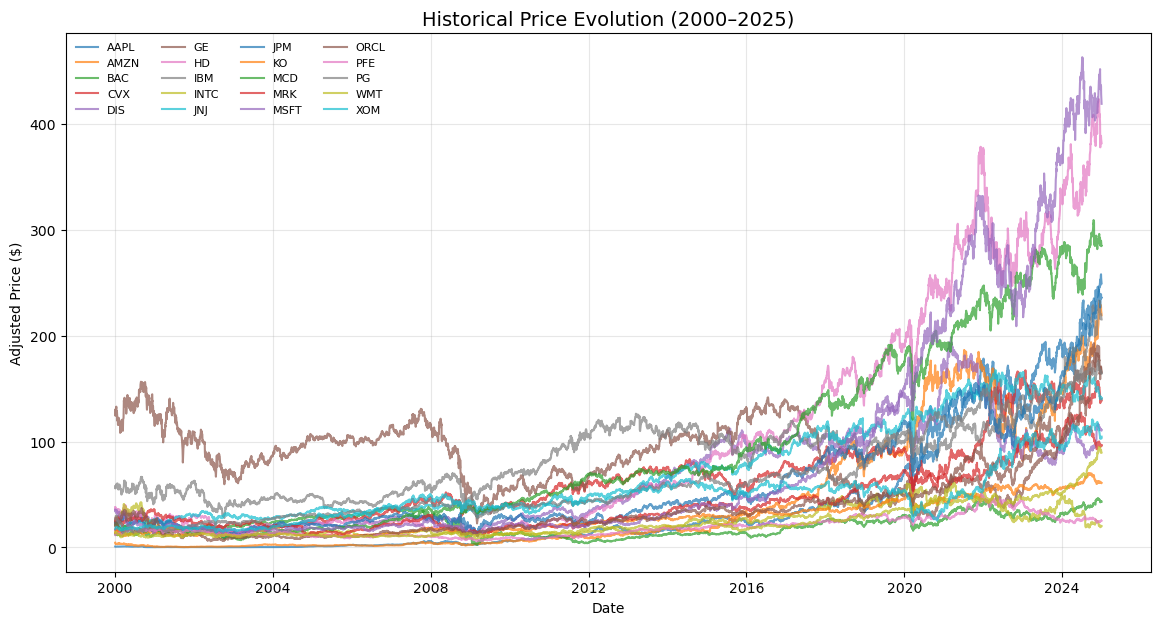

In [9]:
plt.figure(figsize=(14, 7))
for ticker in data.columns:
    plt.plot(data.index, data[ticker], label=ticker, alpha=0.7)

plt.title("Historical Price Evolution (2000–2025)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Adjusted Price ($)")
plt.legend(ncol=4, fontsize=8, frameon=False)
plt.grid(True, alpha=0.3)
plt.show()

### Summary
- Collected historical daily prices for 20 stocks + SPY (2000–2025).  
- Verified data completeness and alignment across tickers.  
- Ready to proceed to **Notebook 02 – Preprocessing & Return Computation**.